<a href="https://colab.research.google.com/github/AkhileshM007/ACE-Portal-Web-Application/blob/main/NLPEVAL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name:Akhilesh Malalikar
Div:B
Roll no:15
SRN:02FE22BCS049


Q 1 a)Given a news article paragraph ,use spacy to extract all named entities and visualize them
How would you handle overlapping entities or ambiguous cases

In [13]:
import spacy
from spacy import displacy

# Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")

# Your news article paragraph
text = """
Apple Inc. announced the release of the new iPhone 15 in Cupertino, California, during its September 2025 event.
CEO Tim Cook emphasized the company’s commitment to environmental sustainability.
"""

# Process the text with spaCy
doc = nlp(text)

# Extract and print named entities
print("Named Entities:\n")
for ent in doc.ents:
    print(f"{ent.text} ({ent.label_})")

# Visualize the entities in the text
displacy.render(doc, style="ent", jupyter=True)


Named Entities:

Apple Inc. (ORG)
15 (CARDINAL)
Cupertino (GPE)
California (GPE)
September 2025 (DATE)
Tim Cook (PERSON)


Q 1 b) Visulaization of word embeddings
use pca or t-sne to reduce dimensions and plot word embeddings for 20 words
what clusters or relationships do u observe in the 2d space

In [7]:
# Install required packages (run only once)
!pip install spacy scikit-learn matplotlib

# Download the spaCy medium model with word vectors
!python -m spacy download en_core_web_md


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 54.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


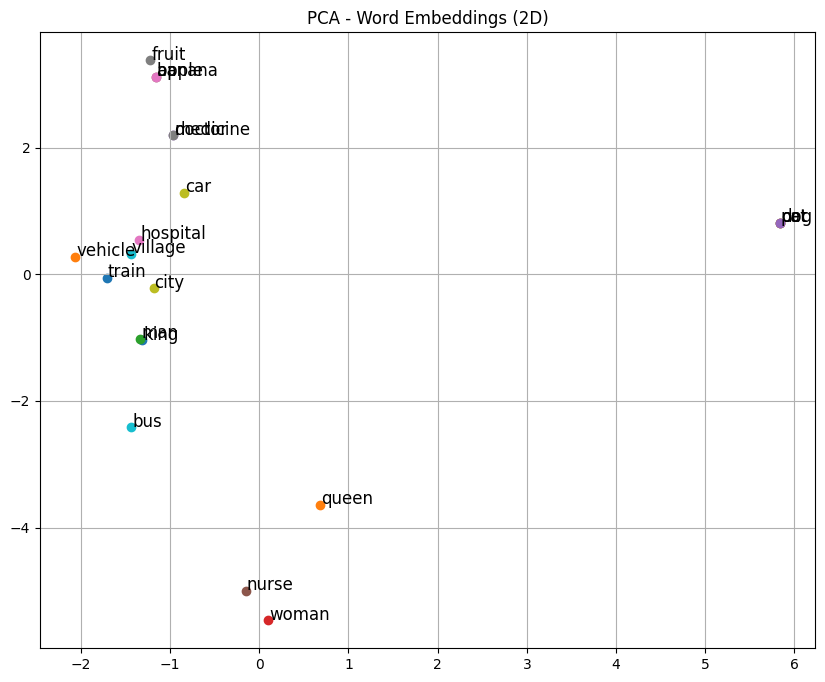

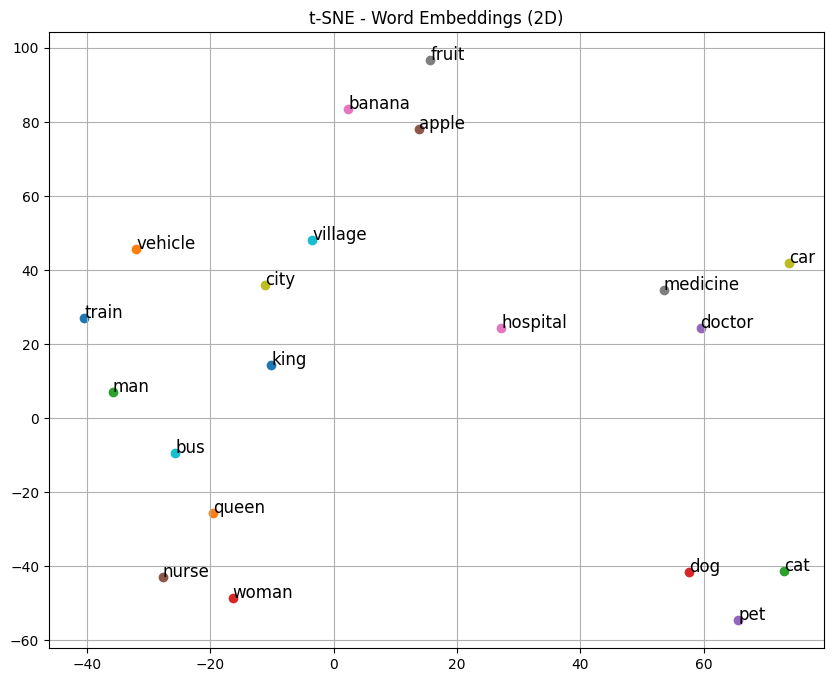

In [10]:
# STEP 2: Import necessary libraries
import spacy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# STEP 3: Load spaCy model with word vectors
nlp = spacy.load("en_core_web_md")

# STEP 4: Define a list of 20 semantically related words
words = [
    "king", "queen", "man", "woman",
    "doctor", "nurse", "hospital", "medicine",
    "car", "bus", "train", "vehicle",
    "cat", "dog", "pet",
    "apple", "banana", "fruit",
    "city", "village"
]

# STEP 5: Extract word embeddings
vectors = [nlp(word).vector for word in words]
vectors = np.array(vectors)  # ✅ Convert to NumPy array

# STEP 6: Dimensionality Reduction
# 6a. PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(vectors)

# 6b. t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42, init='random')
tsne_result = tsne.fit_transform(vectors)

# STEP 7: Plotting Function
def plot_2d(points, labels, title):
    plt.figure(figsize=(10, 8))
    for i, label in enumerate(labels):
        x, y = points[i]
        plt.scatter(x, y)
        plt.text(x + 0.01, y + 0.01, label, fontsize=12)
    plt.title(title)
    plt.grid(True)
    plt.show()

# STEP 8: Visualize PCA and t-SNE projections
plot_2d(pca_result, words, "PCA - Word Embeddings (2D)")
plot_2d(tsne_result, words, "t-SNE - Word Embeddings (2D)")
